In [2]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

from collections import OrderedDict

import matplotlib as mp
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Read in the clean dataset
counties = pd.read_pickle('data/clean_data.pkl')

In [4]:
# Take a look
counties.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State_abrv,num_shootings,had_shootings
0,1001,Alabama,"Autauga County, AL",55036,26899,28137,2.7,75.4,18.9,0.3,...,25.8,24112,74.1,20.2,5.6,0.1,5.2,AL,0.0,0
1,1003,Alabama,"Baldwin County, AL",203360,99527,103833,4.4,83.1,9.5,0.8,...,27.0,89527,80.7,12.9,6.3,0.1,5.5,AL,1.0,1
2,1005,Alabama,"Barbour County, AL",26201,13976,12225,4.2,45.7,47.8,0.2,...,23.4,8878,74.1,19.1,6.5,0.3,12.4,AL,1.0,1
3,1007,Alabama,"Bibb County, AL",22580,12251,10329,2.4,74.6,22.0,0.4,...,30.0,8171,76.0,17.4,6.3,0.3,8.2,AL,0.0,0
4,1009,Alabama,"Blount County, AL",57667,28490,29177,9.0,87.4,1.5,0.3,...,35.0,21380,83.9,11.9,4.0,0.1,4.9,AL,1.0,1


In [5]:
# Let's see the columns 
counties.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'State_abrv',
       'num_shootings', 'had_shootings'],
      dtype='object')

In [ ]:
# Drop unneeded columns. I might have to revisit this later


0    0.764406
1    0.235594
Name: had_shootings, dtype: float64


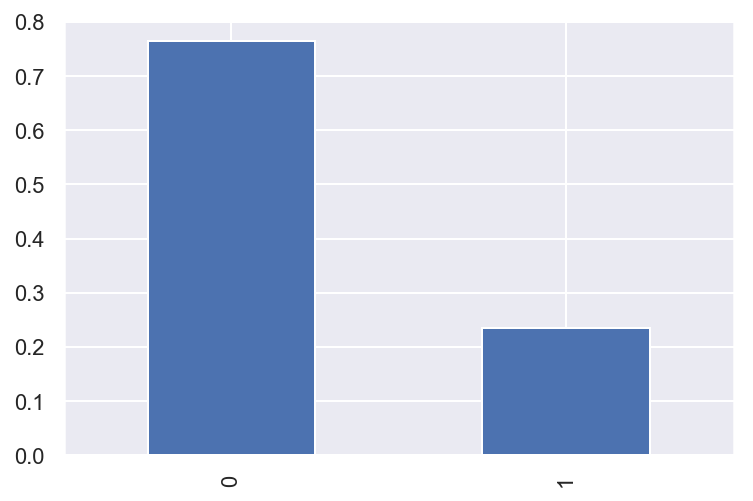

In [6]:
# Checking for class imbalance
target_pcts = counties.had_shootings.value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')